## Problem Statement

Bike sharing systems are a new generation of traditional bike rentals where the whole process from
membership, rental and return back has become automatic. Through these systems, users are able to
easily rent a bike from a particular position and return back at another position. Currently, there are about
over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today,
there exists great interest in these systems due to their important role in traffic, environmental and health
issues. Apart from interesting real-world applications of bike sharing systems, the characteristics of data
being generated by these systems make them attractive for the research.


Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA

## Column Information

The dataset goal is to Predict the bike rental count hourly or daily based on the environmental and seasonal settings.

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users


## Target

 cnt: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [6]:
df = pd.read_csv('data/day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Preprocessing

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.shape

(731, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [12]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [13]:
df[df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There are no duplicate values in the dataset

In [14]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## Univariate Analysis

1.Instant Column

The index variable is of no use so let us drop it

In [15]:
## df.drop(columns = 'instant',inplace= True)

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2.dteday Column

In [17]:
# Convert dteday column to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3.season column

(1:spring, 2:summer, 3:fall, 4:winter)

Seasons are actually a categorical variable but in our dataset it is integer. So we will convert the data into categories.

In [19]:
num2season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

df['season'] = df['season'].replace(num2season)
df.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [20]:
def plot_pie_chart(df, column):
    # Calculate value counts
    counts = df[column].value_counts()
    print(df[column].value_counts())
    
    # Calculate percentages
    percentages = counts / counts.sum() * 100
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
    plt.title(f'Percentage Distribution of {column}')
    plt.legend(labels=percentages.index, loc='upper left')
    plt.show()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64


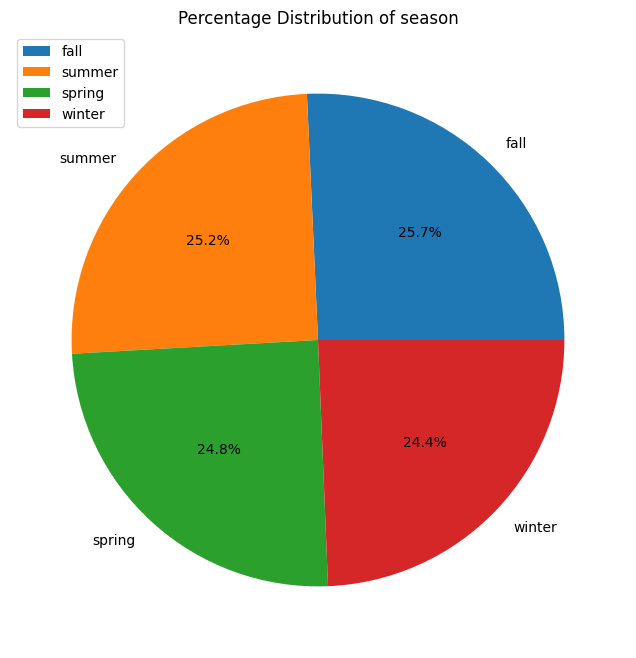

In [21]:
plot_pie_chart(df, 'season')

Fall has the highest number of records with 188 entries, making up approximately 25.7% of the total dataset.
Summer is the second most common season, with 184 entries, representing about 25.2% of the dataset.
Spring has 181 entries, accounting for roughly 24.8% of the total records.
Winter has the fewest entries, with 178 records, making up approximately 24.4% of the dataset.

4.Yr Column:

yr
1    366
0    365
Name: count, dtype: int64


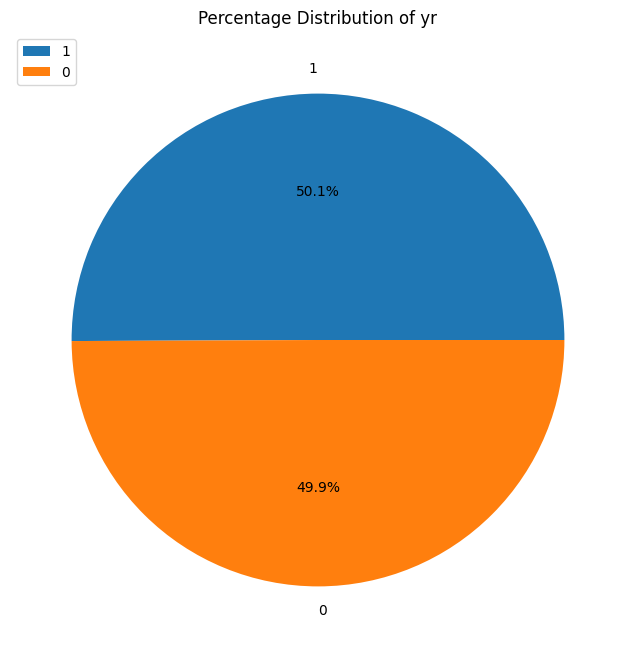

In [22]:
plot_pie_chart(df, 'yr')

Year 2012 (yr = 1) 
Year 2011 (yr = 0)
The bike rentals in 2012 (366 rentals) and 2011 (365 rentals) are almost equal, with only a single rental difference.

In [23]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


5.mnth Column

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64


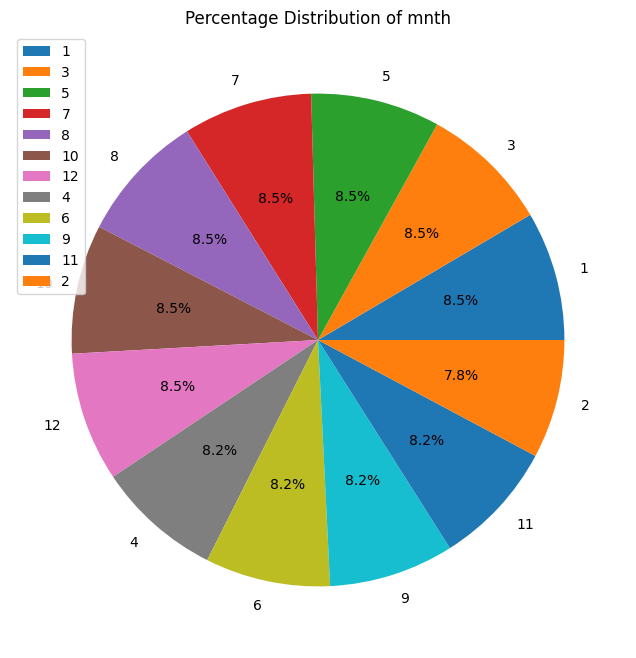

In [24]:
plot_pie_chart(df, 'mnth')

The months of January, March, May, July, August, October, and December each have the highest number of rentals at 62.April, June, September, and November each have 60 rentals.February have least rentals of 57.

6.holiday column

holiday
0    710
1     21
Name: count, dtype: int64


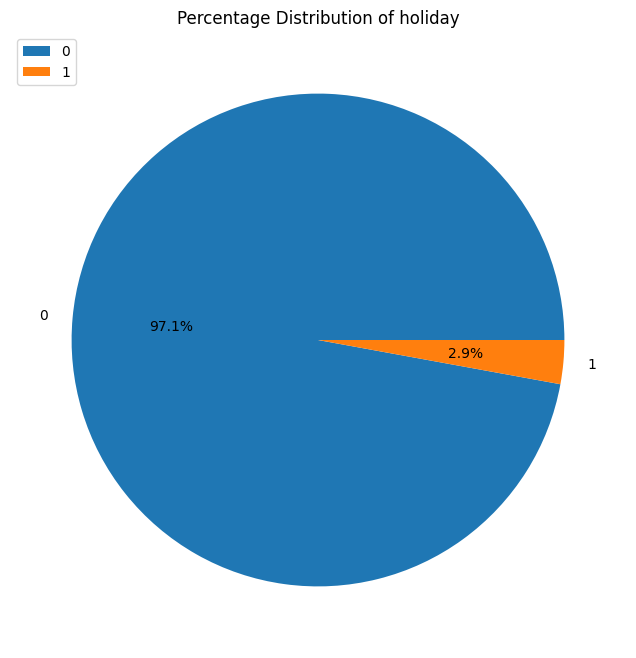

In [25]:
plot_pie_chart(df, 'holiday')

There was 21 holidays in the 2 years

7.weekday column

In [26]:
num2day = {1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 0:'sunday'}

df['weekday'] = df['weekday'].replace(num2day)
df.weekday.unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday'], dtype=object)

weekday
saturday     105
sunday       105
monday       105
tuesday      104
wednesday    104
thursday     104
friday       104
Name: count, dtype: int64


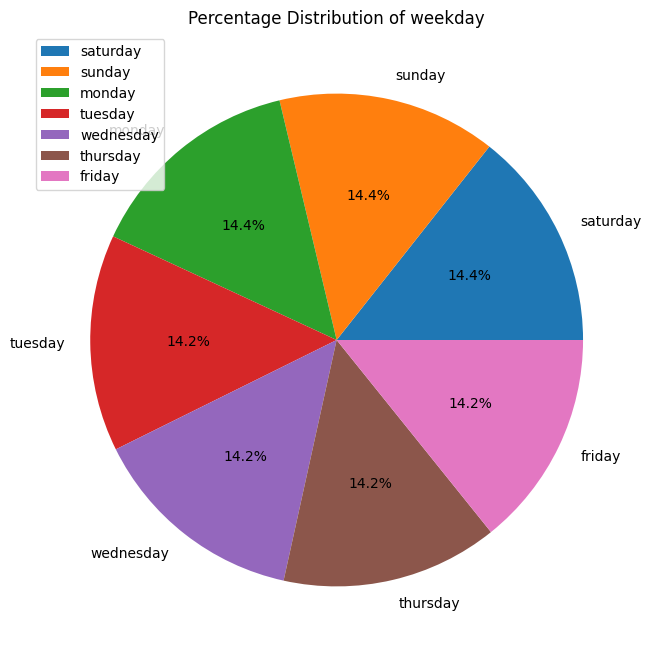

In [27]:
plot_pie_chart(df,'weekday')

The rental counts across weekdays are quite evenly distributed, with each weekday having either 104 or 105 rentals.
This suggests consistent usage of the bike-sharing service throughout the weekdays.


Weekends (Saturday and Sunday) do not show a significant increase in rentals compared to weekdays (Monday to Friday).
This could indicate that the bike-sharing service is used regularly for commuting or daily activities rather than primarily for leisure or weekend outings.

8.workingday

workingday
1    500
0    231
Name: count, dtype: int64


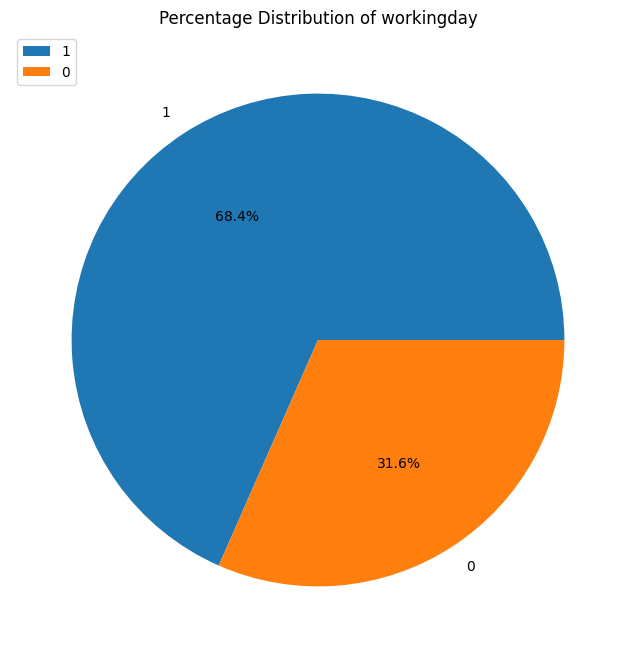

In [28]:
plot_pie_chart(df,'workingday')

Working days (Monday to Friday) have a significantly higher number of bike rentals with 500 rentals.
This suggests that the bike-sharing service is predominantly used for commuting or daily work-related activities during weekdays.


Non-working days (weekends) have fewer rentals with 231 rentals.
This lower count indicates that the bike-sharing service is less utilized on weekends, possibly due to fewer commuting needs and more leisure-oriented activities.

In [29]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


9.weathersit

In [30]:
num2weather = {1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'}

df['weathersit'] = df['weathersit'].replace(num2weather)
df.weathersit.unique()

array(['mist', 'clear', 'light_snow'], dtype=object)

weathersit
clear         463
mist          247
light_snow     21
Name: count, dtype: int64


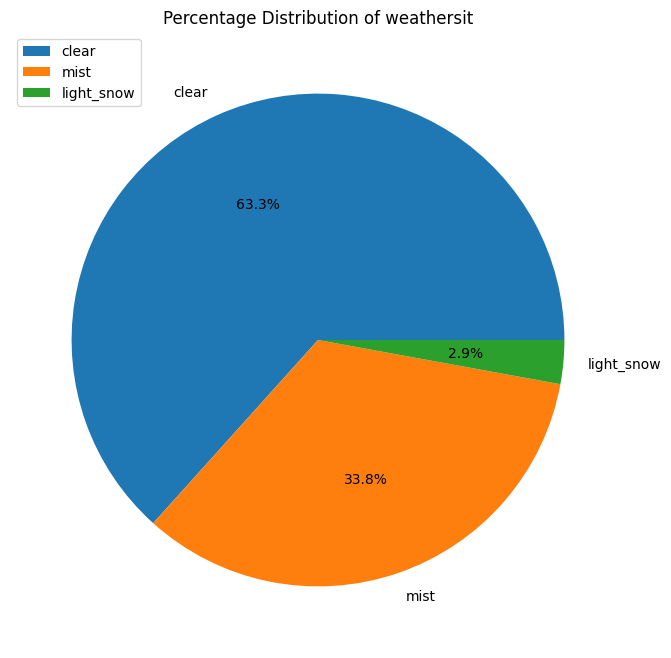

In [31]:
plot_pie_chart(df,'weathersit')

Weathersit 1 (Clear, Few clouds, Partly cloudy) has the highest number of rentals with 463 rentals.
This indicates that clear and partly cloudy weather conditions are the most favorable for bike rentals.
Weathersit 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds) follows with 247 rentals.
While these conditions are not as ideal as Weathersit 1, they still show a considerable number of rentals, suggesting that some users are willing to bike in slightly less favorable weather.
Weathersit 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds) has the lowest number of rentals with only 21 rentals.
This confirms that inclement weather conditions significantly reduce bike rental demand.

10.temp column

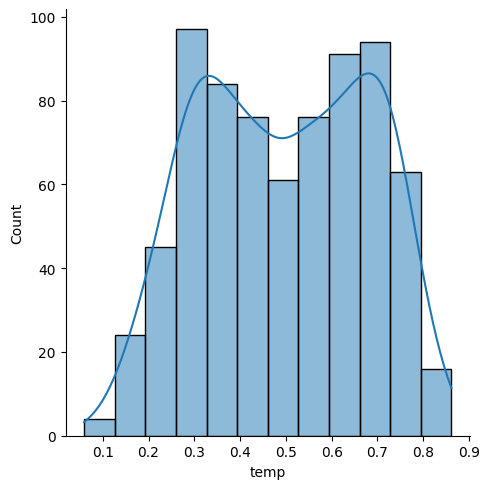

<Axes: ylabel='temp'>

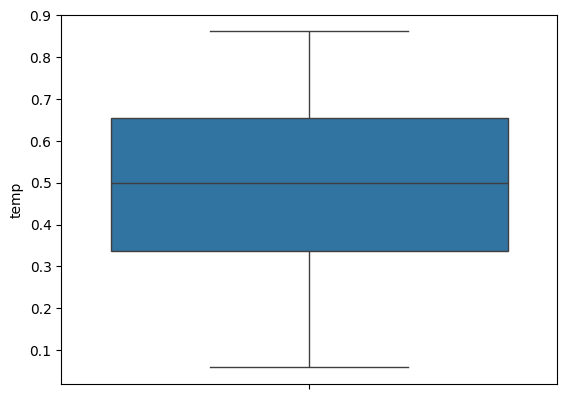

In [32]:
sns.displot(df['temp'],kde=True)
plt.show()
sns.boxplot(df['temp'])

11.atemp column

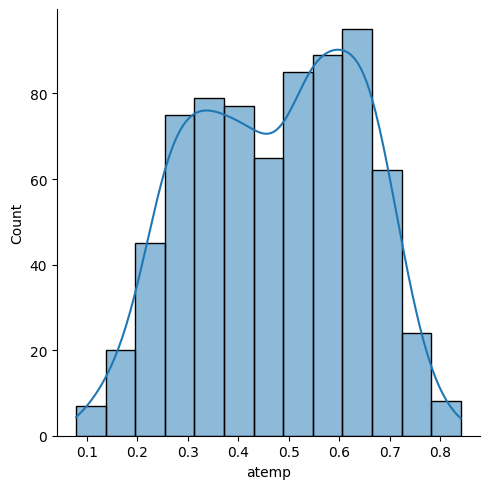

<Axes: ylabel='atemp'>

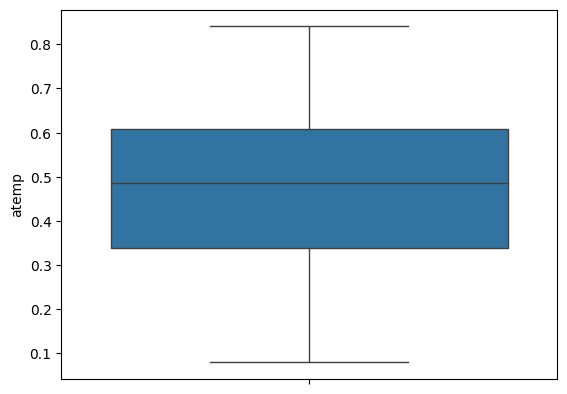

In [33]:
sns.displot(df['atemp'],kde=True)
plt.show()
sns.boxplot(df.atemp)

12.hum column

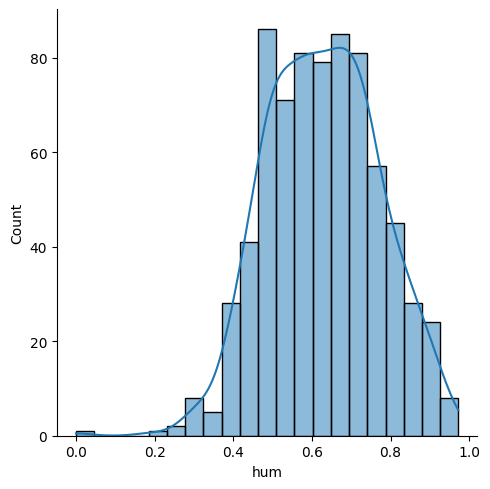

<Axes: ylabel='hum'>

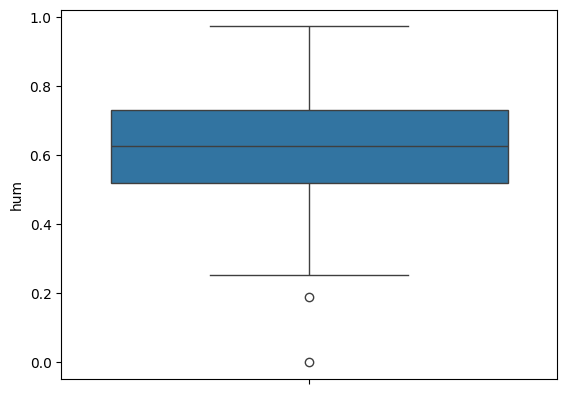

In [34]:
sns.displot(df['hum'],kde=True)
plt.show()
sns.boxplot(df['hum'])

13.windspeed column

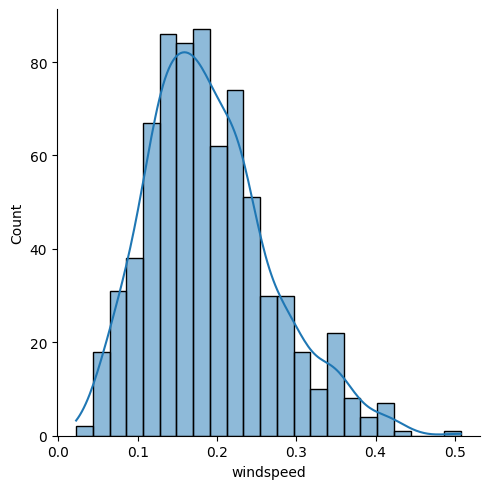

<Axes: ylabel='windspeed'>

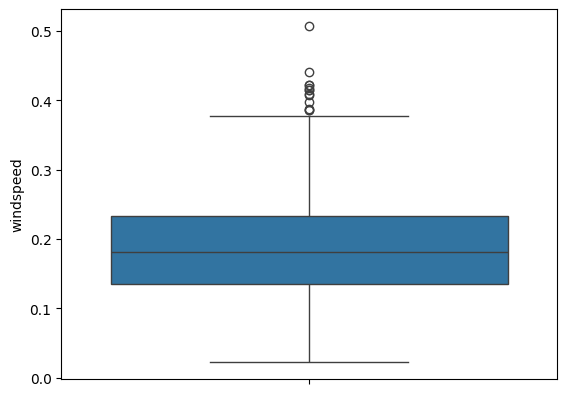

In [35]:
sns.displot(df['windspeed'],kde=True)
plt.show()
sns.boxplot(df['windspeed'])

14.casual column

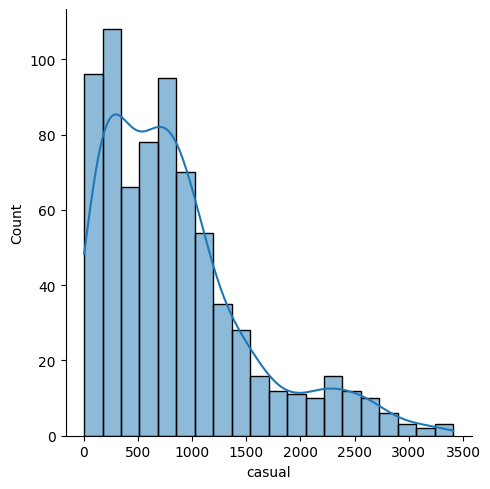

<Axes: ylabel='casual'>

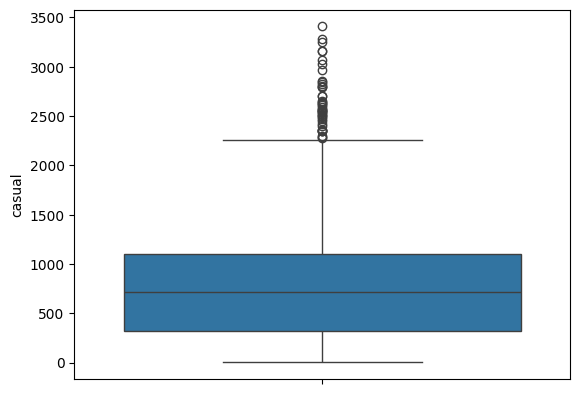

In [36]:
sns.displot(df['casual'],kde=True)
plt.show()
sns.boxplot(df['casual'])

15.registered column

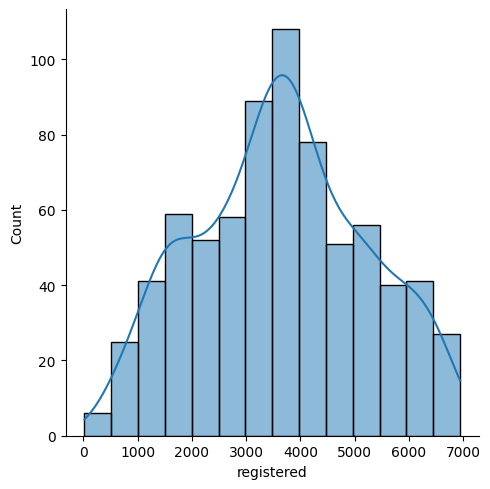

<Axes: ylabel='registered'>

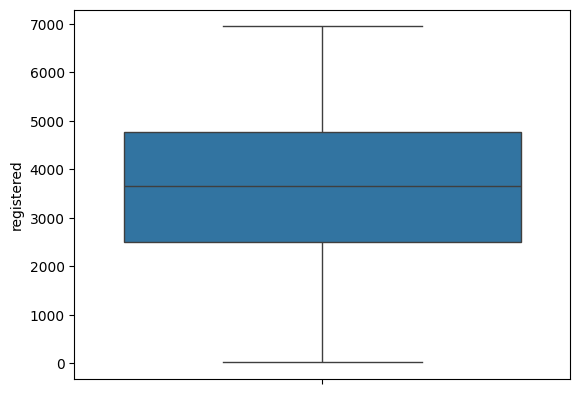

In [37]:
sns.displot(df['registered'],kde=True)
plt.show()
sns.boxplot(df['registered'])

16.cnt column

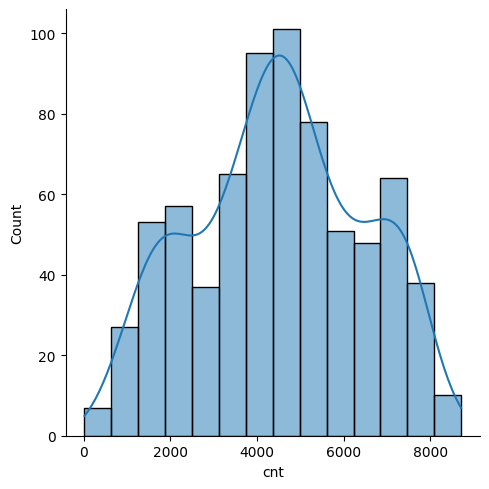

<Axes: ylabel='cnt'>

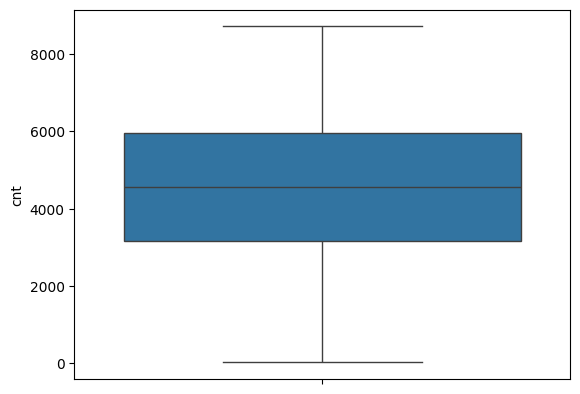

In [38]:
sns.displot(df['cnt'],kde=True)
plt.show()
sns.boxplot(df['cnt'])

In [39]:
df.to_csv('day_cat.csv',index = False)

## Bivariate Analysis

dteday vs cnt

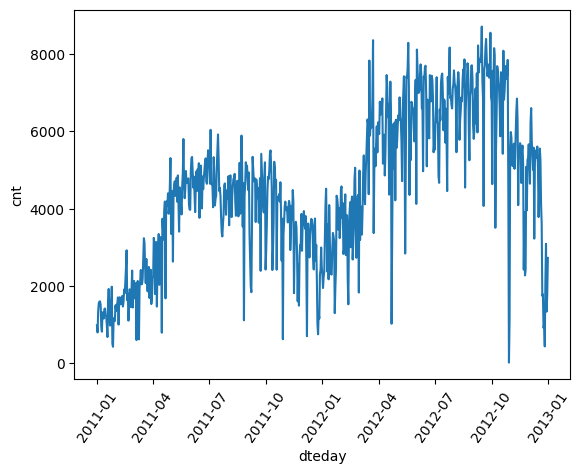

In [40]:
sns.lineplot(data=df, x='dteday', y='cnt')
plt.xticks(rotation=55)
plt.show()

From the above plot we observe a increase in rentals from 2012-4 to 2012-10.

season vs cnt

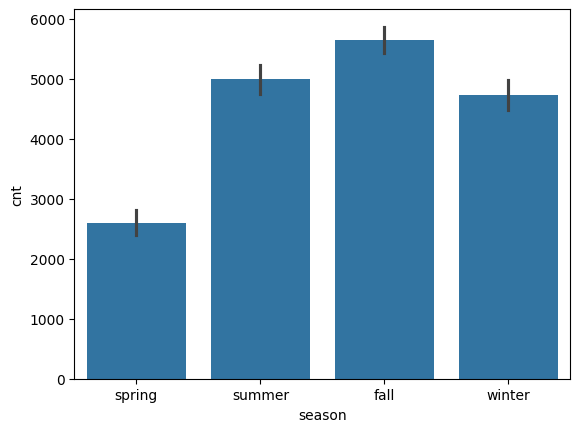

In [41]:
sns.barplot(data=df, x='season', y='cnt')
plt.show()

we observe in fall there is more bike rentals and less in spring.

yr vs cnt

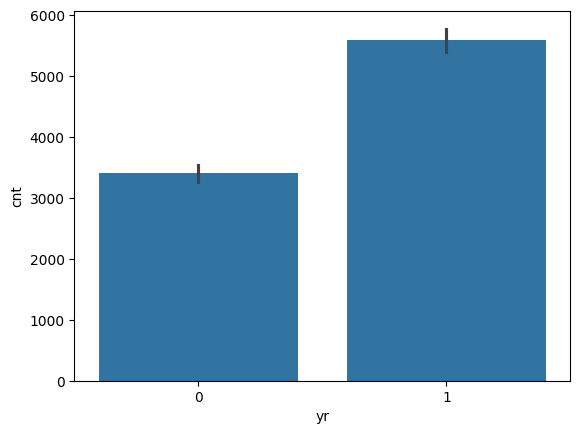

In [42]:
sns.barplot(data=df, x='yr', y='cnt')
plt.show()

mnth vs cnt

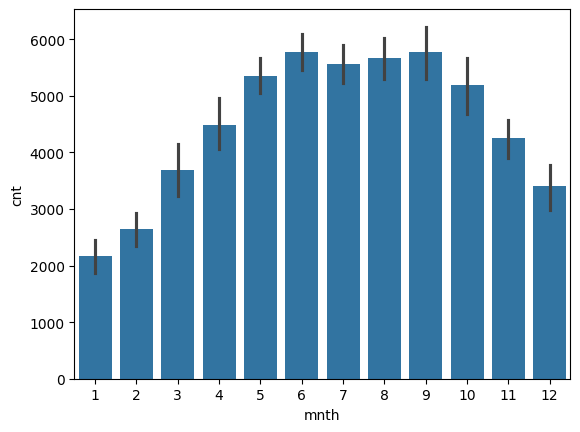

In [43]:
sns.barplot(data=df, x='mnth', y='cnt')
plt.show()

holiday vs cnt

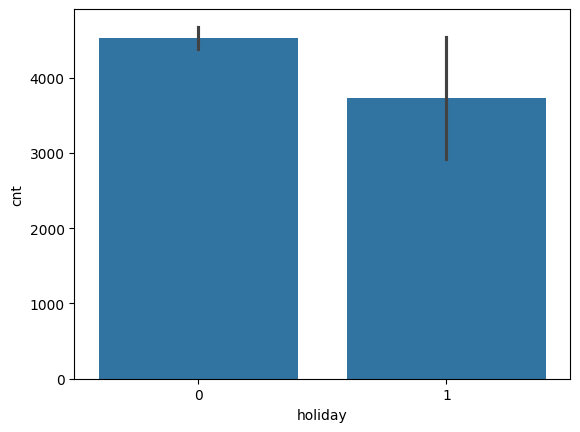

In [44]:
sns.barplot(data=df, x='holiday', y='cnt')
plt.show()

weekday vs cnt

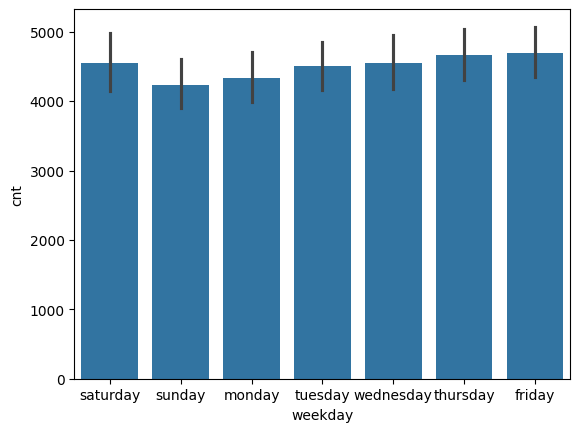

In [45]:
sns.barplot(data=df, x='weekday', y='cnt')
plt.show()

workingday vs cnt

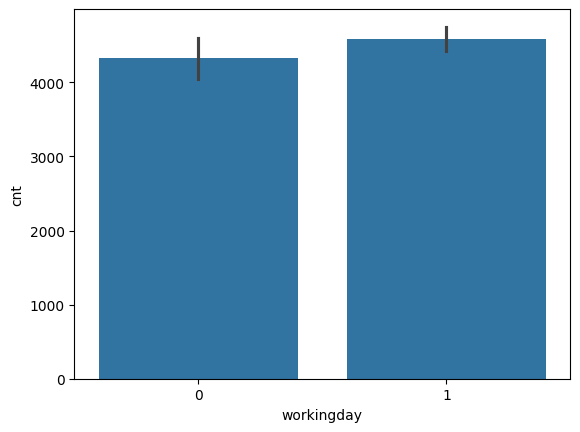

In [46]:
sns.barplot(data=df, x='workingday', y='cnt')
plt.show()

weathersit vs cnt

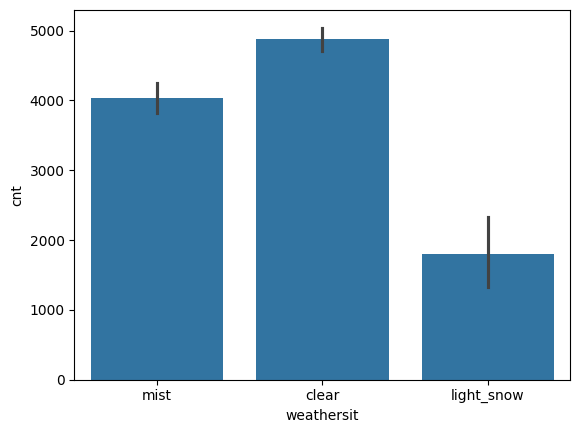

In [47]:
sns.barplot(data=df, x='weathersit', y='cnt')
plt.show()

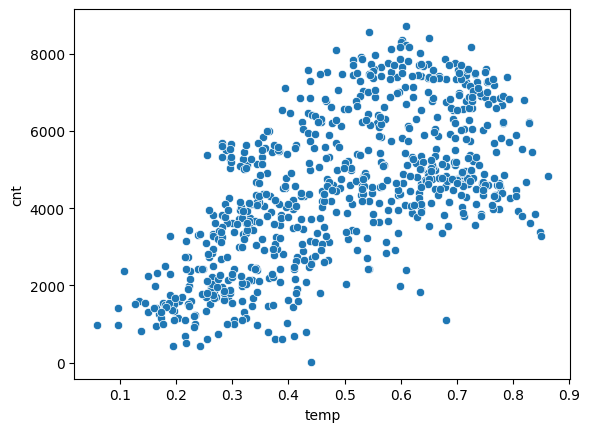

In [48]:
sns.scatterplot(data=df, x='temp', y='cnt')
plt.show()

The plot shows a kind of linear relation between temp and cnt

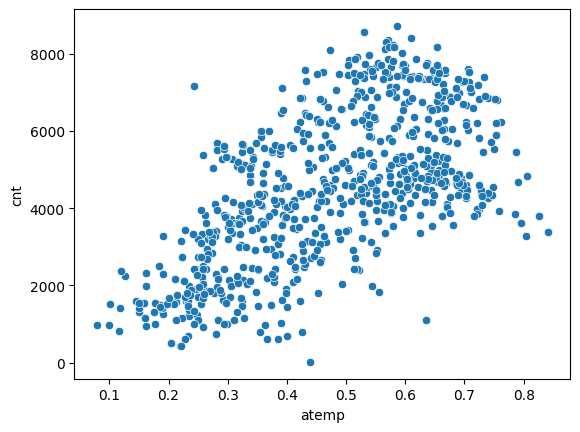

In [49]:
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.show()

The plot shows a kind of linear relation between temp and cnt

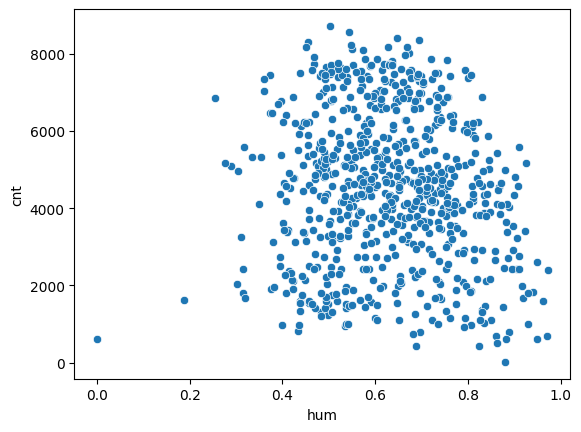

In [50]:
sns.scatterplot(data=df, x='hum', y='cnt')
plt.show()

The data is not evenly scattered in the plot

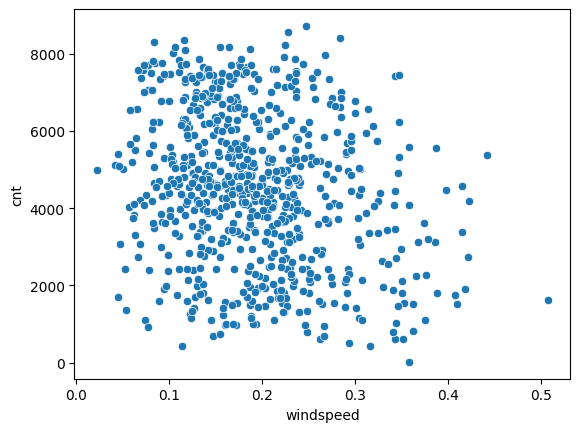

In [51]:
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.show()

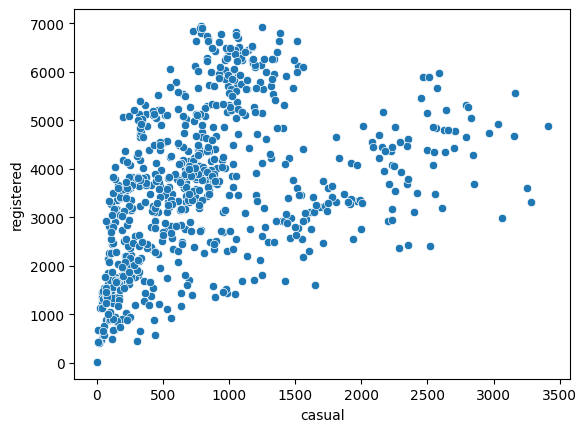

In [52]:
sns.scatterplot(data=df, x='casual', y='registered')
plt.show()

There is a linear relationship between casual and registered 

## Multivariate Analysis

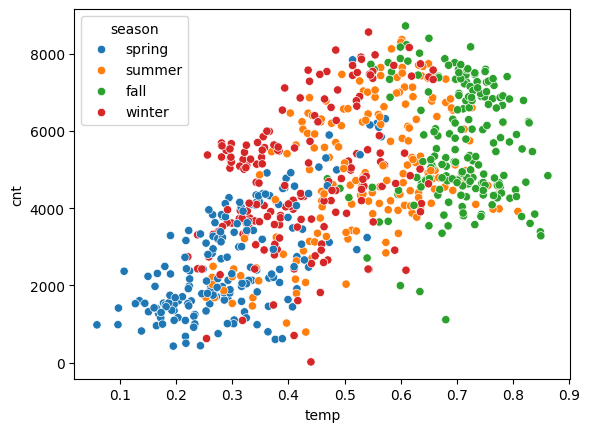

In [53]:
sns.scatterplot(data=df, x='temp', y='cnt', hue='season')
plt.show()

<Axes: >

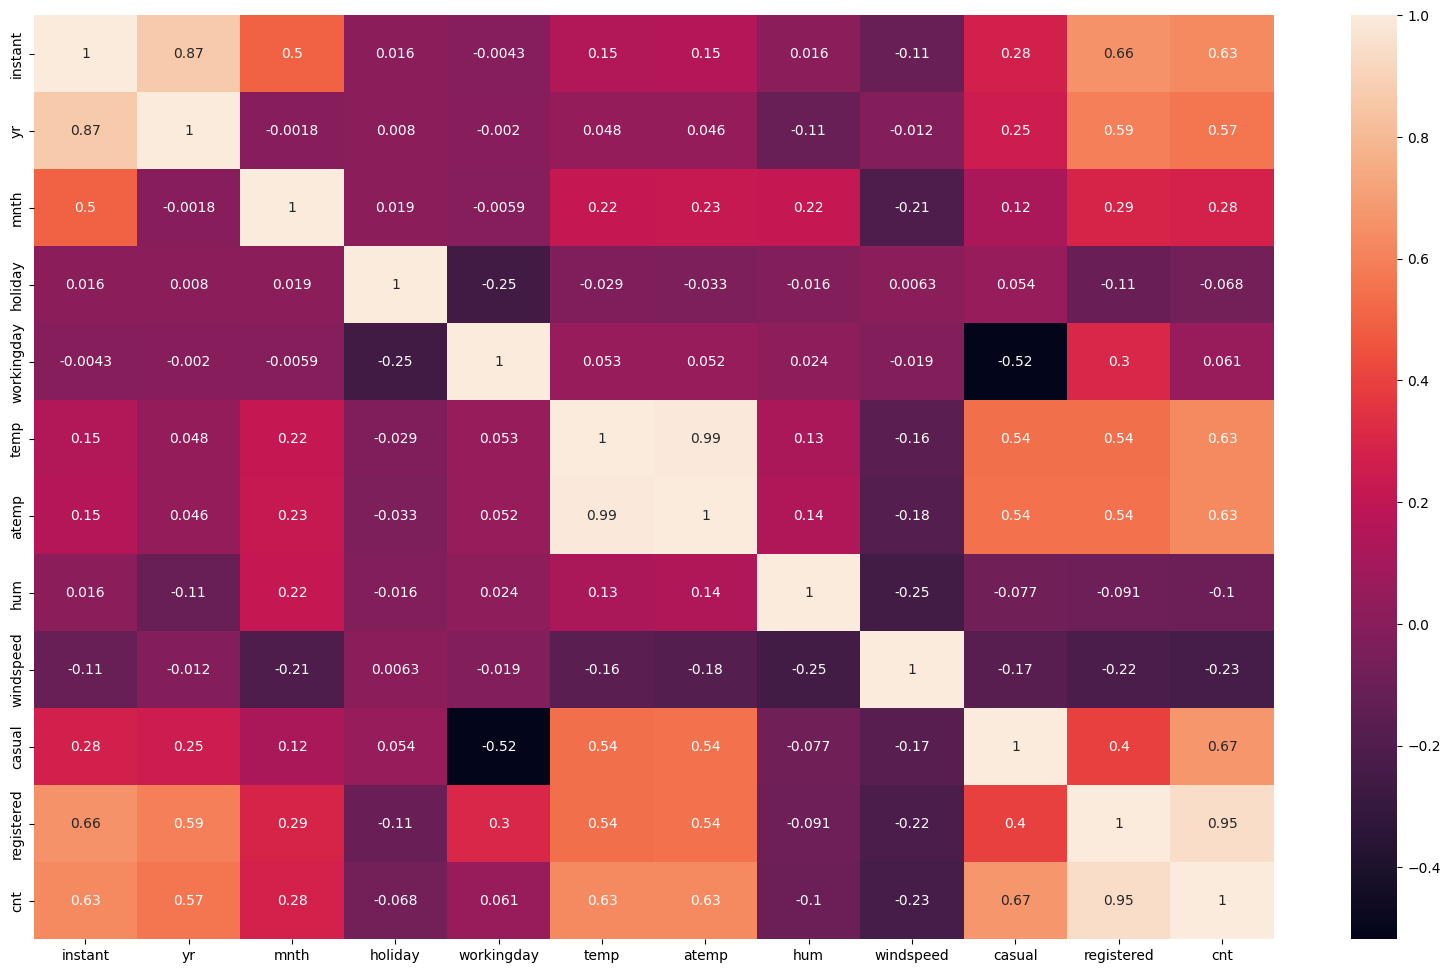

In [54]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only = True),annot = True)


In [55]:
df.drop(columns = 'atemp',inplace = True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(3)
memory usage: 85.8+ 

In [57]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,mist,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,mist,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,clear,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,clear,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,clear,0.226957,0.436957,0.186900,82,1518,1600


In [58]:
df['weathersit'].unique()

array(['mist', 'clear', 'light_snow'], dtype=object)

In [59]:
num2weather

{1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'}

In [60]:
season_map = {'spring':1, 'summer':2, 'fall':3, 'winter':4}

In [61]:
week_map = {'saturday':6, 'sunday':0, 'monday':1, 'tuesday':2, 'wednesday':3, 'thursday':4,
       'friday':5}

In [62]:
weather_map={'mist':2, 'clear':1, 'light_snow':3}

In [63]:
df['season'] = df['season'].map(season_map)
df['weekday'] = df['weekday'].map(week_map)
df['weathersit'] = df['weathersit'].map(weather_map)

In [64]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 85.8 KB
